In [27]:
import numpy as np
import seaborn as sns
import pandas as pd
from jupyterthemes import jtplot
import matplotlib.pyplot as plt

# jtplot.style('onedork',figsize=(20, 10), fscale=2)
jtplot.style('grade3',figsize=(20, 10), fscale=2)

In [28]:
pilot_data_path = '/Users/krista/Dropbox/loki_1/fmri_experiment/data/pilot_timing/'
pilot_df = pd.read_csv(pilot_data_path + '-1_sess0_cond8515.csv')
pilot_df.columns = pilot_df.columns.str.strip()

exp_param_path = '/Users/krista/Dropbox/loki_1/fmri_experiment/experimental_parameters/'
exp_param_df = pd.read_csv(exp_param_path + 'lc_0_test.csv')
exp_param_df.columns = exp_param_df.columns.str.strip()

exp_param_df = exp_param_df.sort_values('trial')
pilot_df = pilot_df.sort_values('trial')

In [29]:
pilot_df.head()
exp_param_df.head()

,r_t1,r_t2,cp,obs_cp,mu_rewards,std_rewards,condition,trial,trialset,epoch_n,ID,p_id_solution,p_t1,p_t2,epoch_trial,iti,f_image,m_image
0,0.000000,3.050408,0,0,3,1,lc,1,0,0,761,102,0.15,0.85,1,1.257600,f5~57-v1.tif,m1~12-v1.tif
1,0.000000,1.313202,0,0,3,1,lc,2,0,0,761,102,0.15,0.85,2,1.366208,f3~33-v1.tif,m3~32-v1.tif
2,0.000000,2.605880,0,0,3,1,lc,3,0,0,761,102,0.15,0.85,3,1.310031,f1~16-v1.tif,m1~12-v1.tif
3,0.000000,3.740468,0,0,3,1,lc,4,0,0,761,102,0.15,0.85,4,1.074311,f3~35-v1.tif,m1~16-v1.tif
4,3.329545,0.000000,0,1,3,1,lc,5,0,0,761,102,0.15,0.85,5,1.172617,f5~510-v1.tif,m4~47-v1.tif


In [30]:
pilot_df['epoch_trial'] = exp_param_df.epoch_trial
pilot_df['epoch_n'] = exp_param_df.epoch_n

In [31]:
pilot_df.head()

,trial,subj_id,session_n,condition,run,LR_choice,value_accuracy,value_LR_solution,reward,cumulative_reward,...,p_accuracy,p_LR_solution,p_id_solution,id_choice,stim_duration,stim_onset,stim_offset,abs_response_time,epoch_trial,epoch_n
0,0.0,-1.0,0.0,8515.0,0.0,82.0,1.0,82.0,3.0,303.0,...,1.0,82.0,102.0,102.0,1.499958,0.033351,1.533310,0.846411,1,0
1,1.0,-1.0,0.0,8515.0,0.0,82.0,0.0,76.0,0.0,302.0,...,0.0,76.0,102.0,109.0,1.499977,2.849961,4.349938,3.156551,2,0
2,2.0,-1.0,0.0,8515.0,0.0,76.0,0.0,82.0,0.0,301.0,...,0.0,82.0,102.0,109.0,1.499977,5.783249,7.283226,6.521610,3,0
3,3.0,-1.0,0.0,8515.0,0.0,82.0,1.0,82.0,3.0,304.0,...,1.0,82.0,102.0,102.0,1.499986,8.649871,10.149857,8.937645,4,0
4,4.0,-1.0,0.0,8515.0,0.0,82.0,0.0,76.0,0.0,303.0,...,1.0,82.0,102.0,102.0,1.499973,11.283168,12.783141,11.637612,5,0


In [48]:
pilot_df.p_accuracy.mean()

0.6161616161616161

([<matplotlib.axis.YTick at 0x11bd054a8>,
 <a list of 10 Text yticklabel objects>)

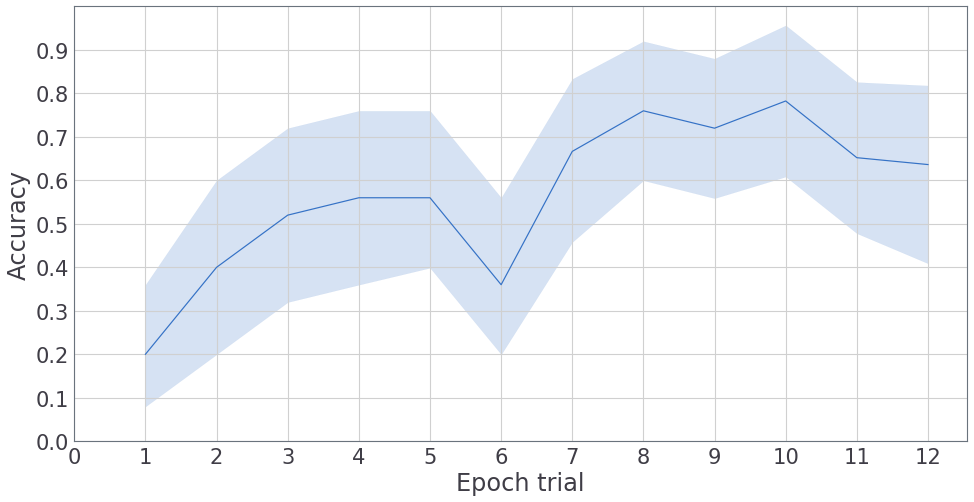

In [32]:
n_epoch_trials = 13

sns.lineplot(x='epoch_trial',y='p_accuracy', data=pilot_df.loc[pilot_df.epoch_trial < n_epoch_trials])
plt.xlabel('Epoch trial')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,n_epoch_trials, 1))
plt.yticks(np.arange(0, 1, 0.1))

Text(0,0.5,'Reaction time (s)')

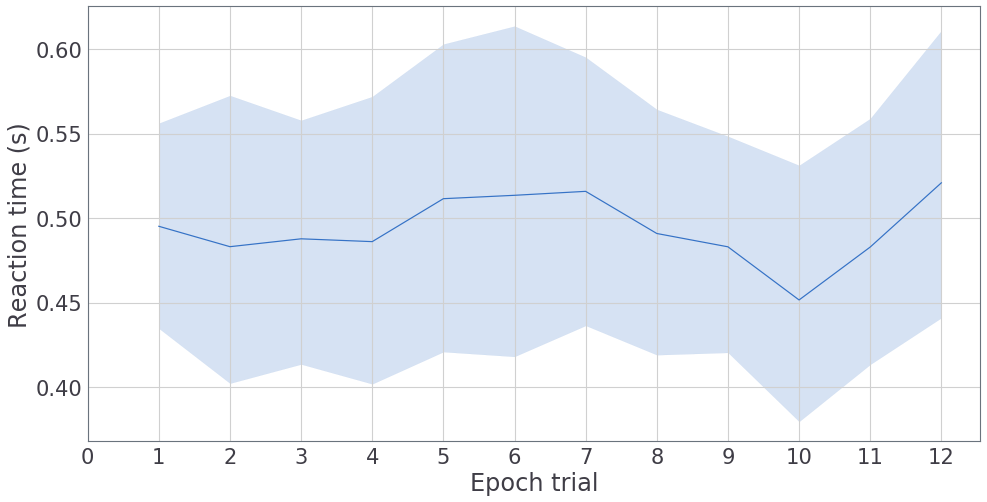

In [33]:
# rt_min = 0.2
# rt_max = pilot_df.rt.median()
sns.lineplot(x='epoch_trial',y='rt', data=pilot_df.loc[pilot_df.epoch_trial < n_epoch_trials], estimator=np.mean)
plt.xticks(np.arange(0,n_epoch_trials, 1))
# plt.yticks(np.arange(rt_min, rt_max, 0.1))
plt.xlabel('Epoch trial')
plt.ylabel('Reaction time (s)')

Text(0,0.5,'Raw reaction time (s)')

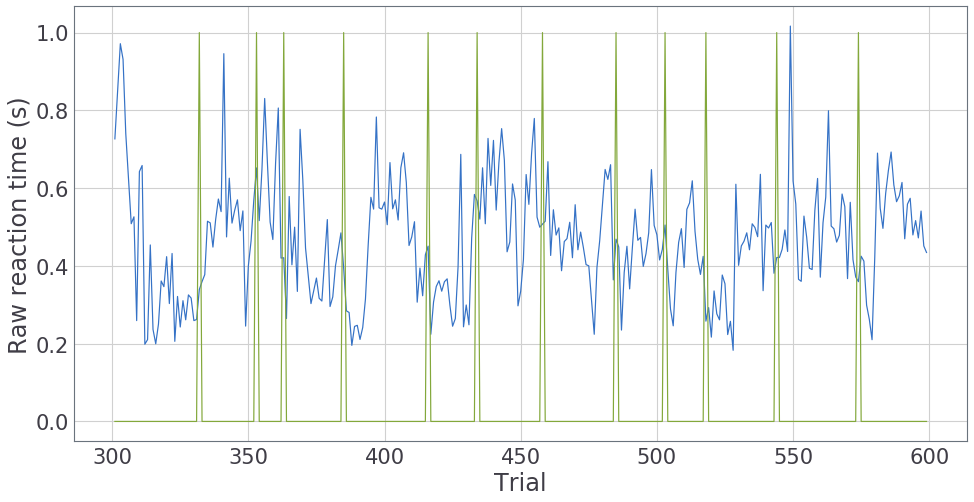

In [34]:
sns.lineplot(x='trial',y='rt', data=pilot_df.loc[pilot_df.trial > 300])
sns.lineplot(x='trial', y='cp_list', data=pilot_df.loc[pilot_df.trial > 300])
plt.xlabel('Trial')
plt.ylabel('Raw reaction time (s)')

([<matplotlib.axis.YTick at 0x11c34c048>,
 <a list of 11 Text yticklabel objects>)

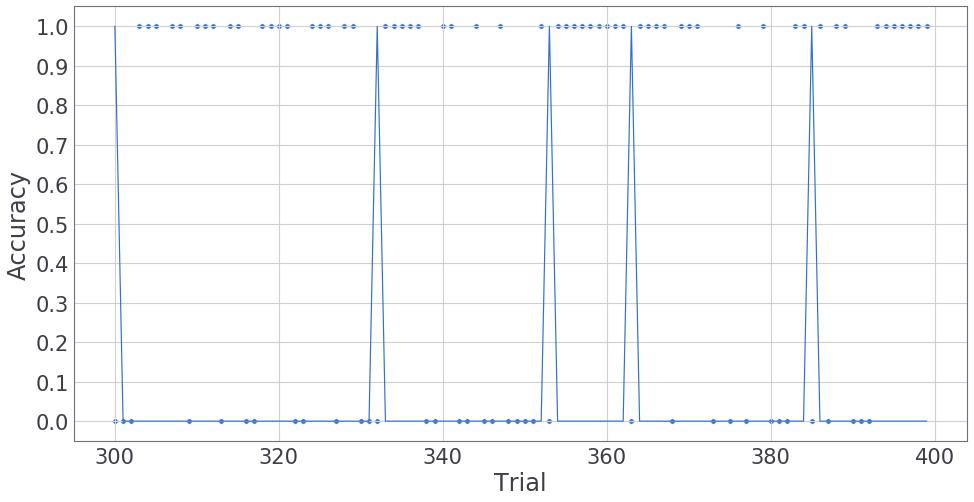

In [35]:
sns.scatterplot(x='trial',y='p_accuracy', data=pilot_df[300:400],markers='k.')
sns.lineplot(x='trial', y='cp_list', data=pilot_df[300:400])
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1.1, 0.1))

([<matplotlib.axis.YTick at 0x11c4c8080>,
 <a list of 11 Text yticklabel objects>)

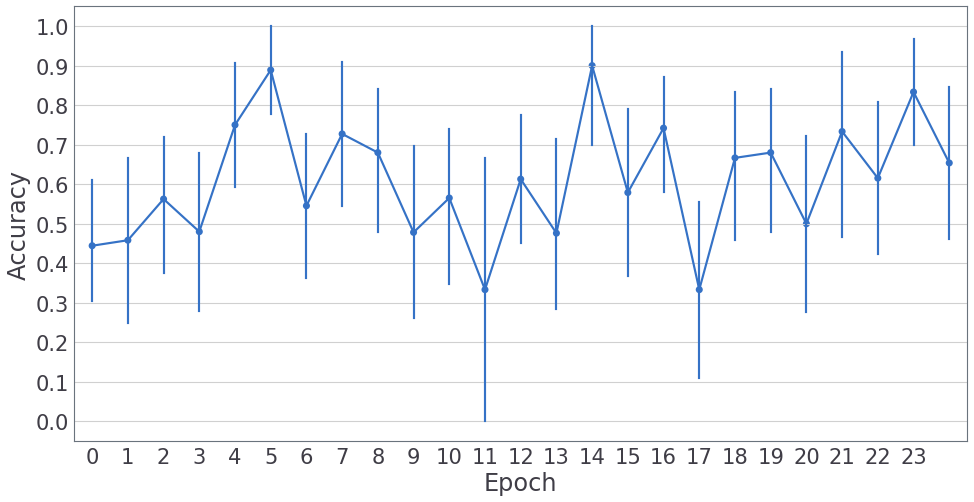

In [36]:
sns.pointplot(x='epoch_n',y='p_accuracy', data=pilot_df, )
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,pilot_df.epoch_n.max(), 1))
plt.yticks(np.arange(0, 1.1, 0.1))

([<matplotlib.axis.YTick at 0x11ca06550>,
 <a list of 11 Text yticklabel objects>)

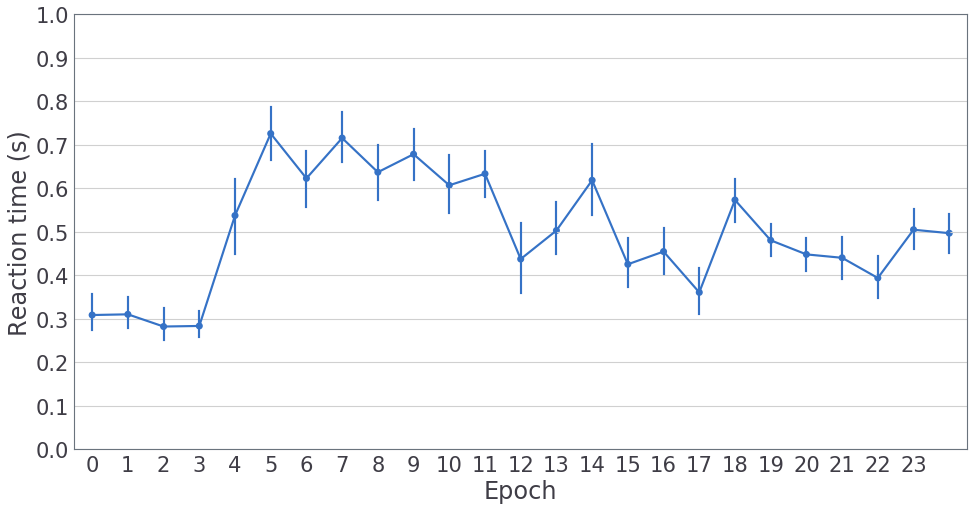

In [37]:
sns.pointplot(x='epoch_n',y='rt', data=pilot_df, )
plt.xlabel('Epoch')
plt.ylabel('Reaction time (s)')
plt.xticks(np.arange(0,pilot_df.epoch_n.max(), 1))
plt.yticks(np.arange(0, 1.1, 0.1))

In [38]:
# rt_plt = sns.pointplot(x='epoch_n',y='rt', data=pilot_df, color='red', label='rt')
# acc_plt = sns.pointplot(x='epoch_n',y='p_accuracy', data=pilot_df, color='forestgreen', label='accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('')
# plt.xticks(np.arange(0,pilot_df.epoch_n.max(), 1))
# plt.yticks(np.arange(0, 1.1, 0.1))

Text(0,0.5,'Reaction time (s)')

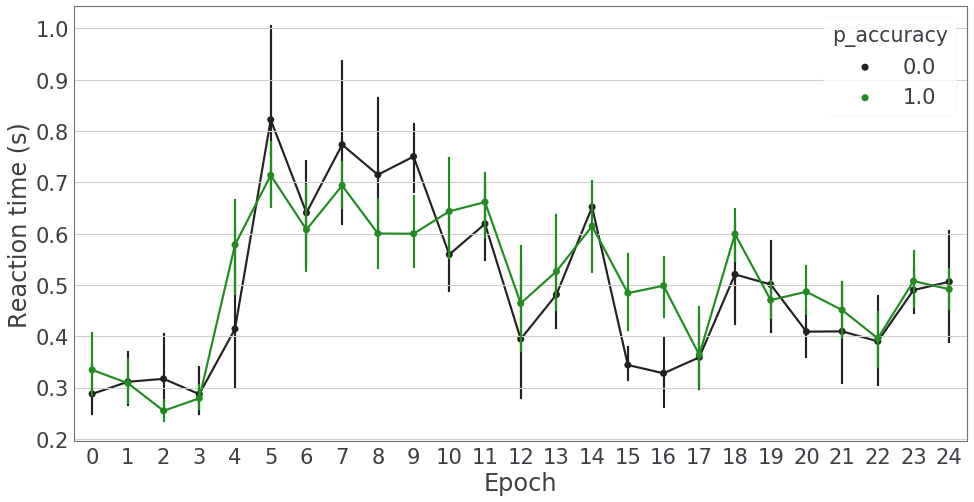

In [39]:
acc_plt = sns.pointplot(x='epoch_n',y='rt', hue='p_accuracy', data=pilot_df, color='forestgreen')
plt.xlabel('Epoch')
plt.ylabel('Reaction time (s)')

/Users/Krista/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Krista/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0,0.5,'Probability density')

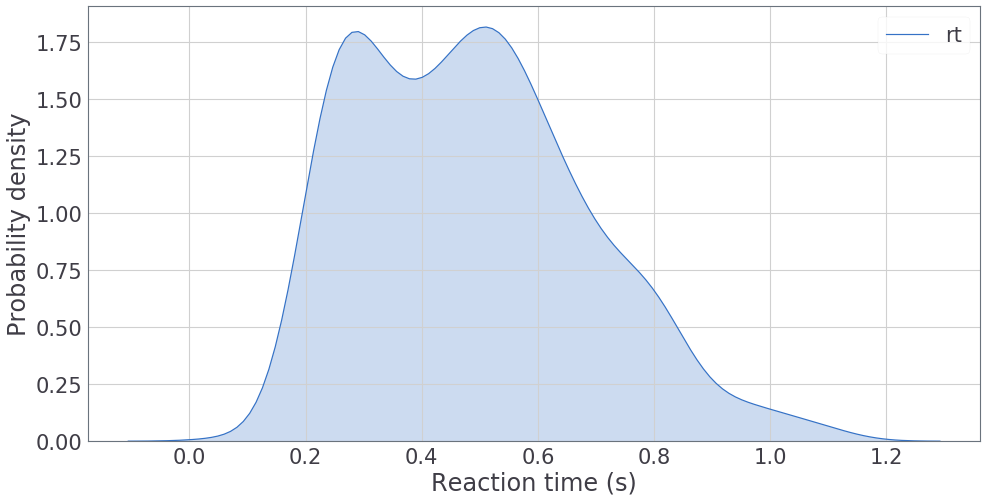

In [40]:
sns.kdeplot(pilot_df.rt, shade=True)
plt.xlabel('Reaction time (s)')
plt.ylabel('Probability density')

In [41]:
(pilot_df.rt < .1).sum() #one trial escaped fast flagging 

1

In [42]:
pilot_df[pilot_df.rt < .1]

,trial,subj_id,session_n,condition,run,LR_choice,value_accuracy,value_LR_solution,reward,cumulative_reward,...,p_accuracy,p_LR_solution,p_id_solution,id_choice,stim_duration,stim_onset,stim_offset,abs_response_time,epoch_trial,epoch_n
125,125.0,-1.0,0.0,8515.0,0.0,76.0,1.0,76.0,0.0,357.0,...,1.0,76.0,102.0,102.0,1.49998,349.844342,351.344322,349.913577,9,4


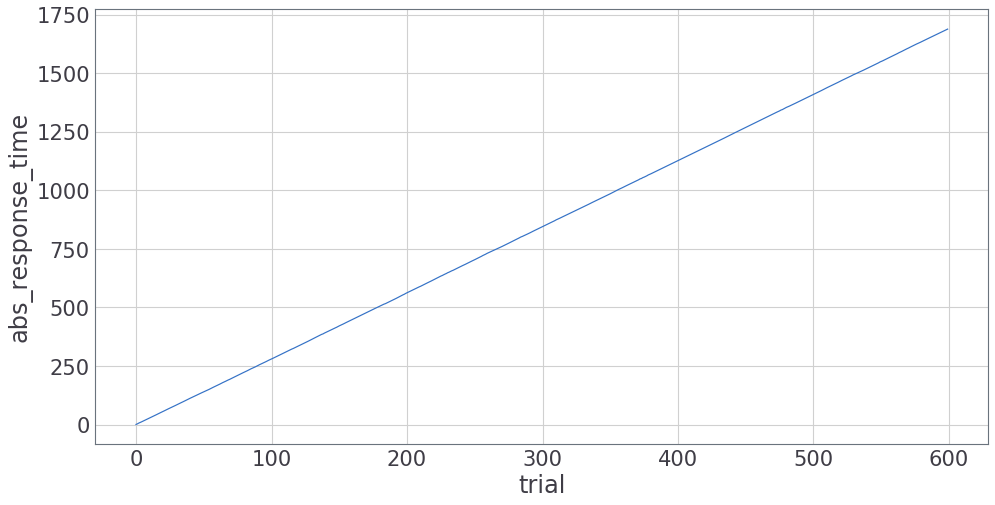

In [43]:
sns.lineplot(x='trial',y='abs_response_time', data=pilot_df, )

In [44]:
sum(pilot_df.stim_offset > pilot_df.stim_onset) == len(pilot_df.trial)

True

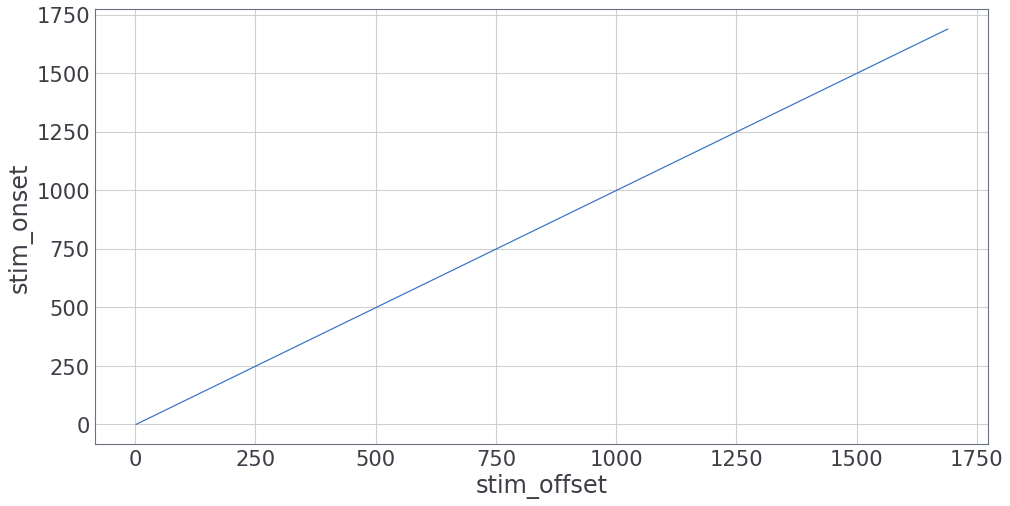

In [45]:
sns.lineplot(x='stim_offset',y='stim_onset', data=pilot_df, )

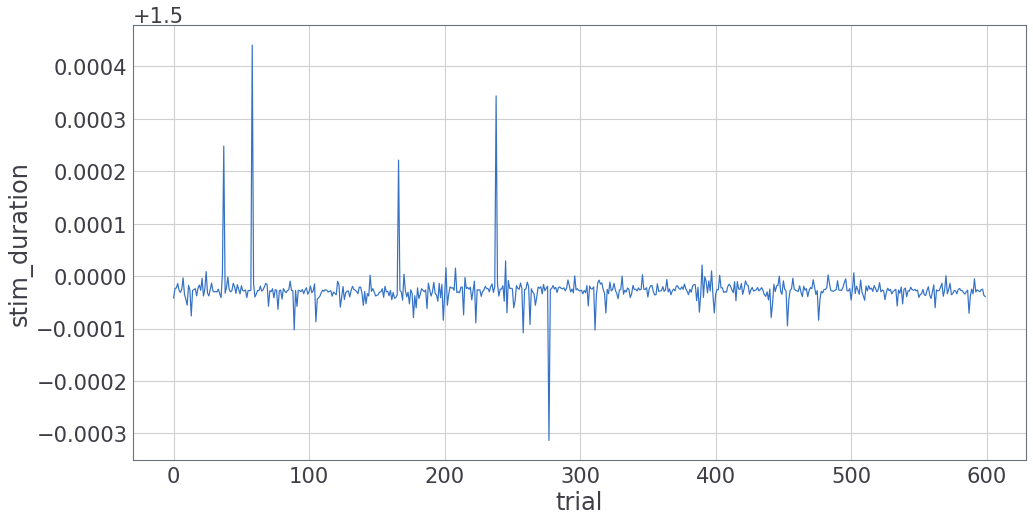

In [46]:
sns.lineplot(x='trial',y='stim_duration', data=pilot_df, )

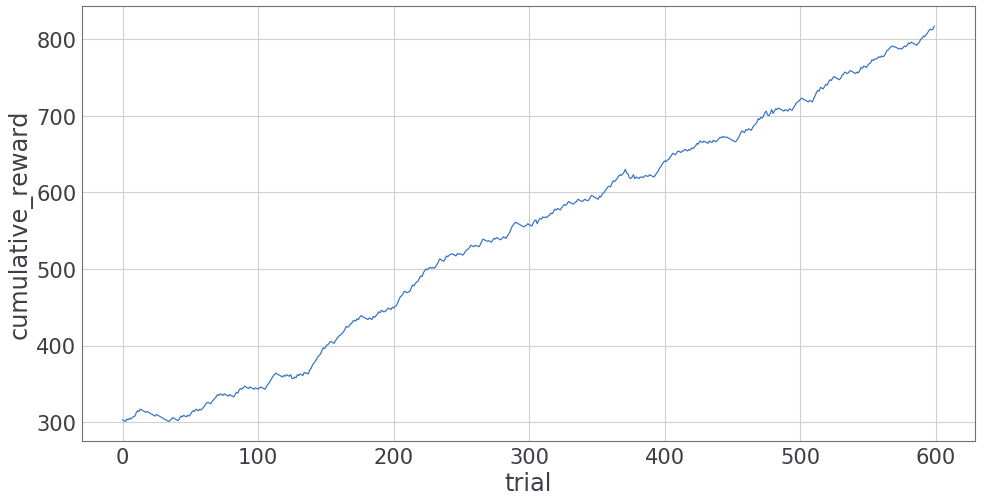

In [47]:
sns.lineplot(x='trial',y='cumulative_reward', data=pilot_df, )